# Лабораторна робота 3

### Виконала: Лаврій Софія

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [209]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [210]:
train_data = train_data[np.where(np.in1d(train_labels, [0, 4, 7]))]
train_labels = train_labels[np.where(np.in1d(train_labels, [0, 4, 7]))]
test_data = test_data[np.where(np.in1d(test_labels, [0, 4, 7]))]
test_labels = test_labels[np.where(np.in1d(test_labels, [0, 4, 7]))]
class_names_1 = [class_names[i] for i in [0, 4, 7]]

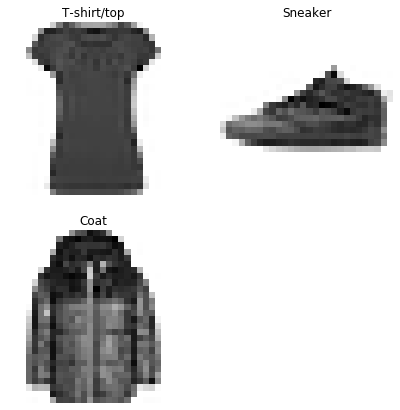

In [212]:
import random
plt.figure(figsize=(7, 7))
for i in range(3):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [213]:
np.unique(test_labels), np.unique(train_labels)

(array([0, 4, 7], dtype=uint8), array([0, 4, 7], dtype=uint8))

In [161]:
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10,  activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
model1_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
563/563 [==============================] - 2s 2ms/step - loss: 2.1091 - accuracy: 0.3307 - val_loss: 1.3939 - val_accuracy: 0.3333
Epoch 2/10
563/563 [==============================] - 1s 2ms/step - loss: 1.1147 - accuracy: 0.4337 - val_loss: 0.7166 - val_accuracy: 0.6390
Epoch 3/10
563/563 [==============================] - 1s 2ms/step - loss: 0.6209 - accuracy: 0.7134 - val_loss: 0.5285 - val_accuracy: 0.8097
Epoch 4/10
563/563 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8704 - val_loss: 0.4593 - val_accuracy: 0.7497
Epoch 5/10
563/563 [==============================] - 1s 2ms/step - loss: 0.2980 - accuracy: 0.9088 - val_loss: 0.2829 - val_accuracy: 0.9130
Epoch 6/10
563/563 [==============================] - 1s 2ms/step - loss: 0.2515 - accuracy: 0.9214 - val_loss: 0.2151 - val_accuracy: 0.9363
Epoch 7/10
563/563 [==============================] - 1s 2ms/step - loss: 0.2357 - accuracy: 0.9216 - val_loss: 0.2331 - val_accuracy: 0.9107
Epoch 

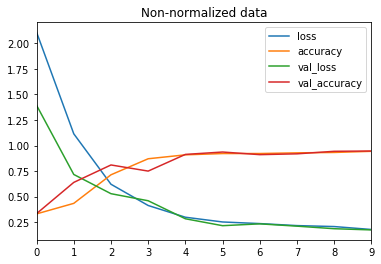

In [162]:
history1_df = pd.DataFrame(model1_history.history)
history1_df.plot(title='Non-normalized data')

In [163]:
predicted_labels1 = model_1.predict(test_data)
predicted_labels1 = predicted_labels1.argmax(axis=1)
print(f"Model 1, not normalized data:\n {confusion_matrix(y_true=test_labels, y_pred=predicted_labels1)}")

Model 1, not normalized data:
 [[ 900   97    3]
 [  40  939   21]
 [   0    0 1000]]


In [164]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [165]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [166]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = model_1

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
model2_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
563/563 [==============================] - 2s 2ms/step - loss: 0.6331 - accuracy: 0.7703 - val_loss: 0.3174 - val_accuracy: 0.8777
Epoch 2/10
563/563 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.9044 - val_loss: 0.2401 - val_accuracy: 0.9237
Epoch 3/10
563/563 [==============================] - 1s 2ms/step - loss: 0.2128 - accuracy: 0.9336 - val_loss: 0.2049 - val_accuracy: 0.9330
Epoch 4/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1843 - accuracy: 0.9428 - val_loss: 0.1821 - val_accuracy: 0.9420
Epoch 5/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1643 - accuracy: 0.9482 - val_loss: 0.1643 - val_accuracy: 0.9477
Epoch 6/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1508 - accuracy: 0.9524 - val_loss: 0.1550 - val_accuracy: 0.9507
Epoch 7/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1404 - accuracy: 0.9546 - val_loss: 0.1444 - val_accuracy: 0.9540
Epoch 

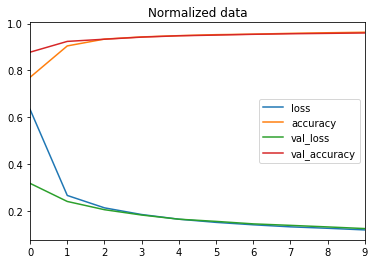

In [167]:
history2_df = pd.DataFrame(model2_history.history)
history2_df.plot(title='Normalized data')

In [168]:
predicted_labels2 = model_2.predict(test_data)
predicted_labels2 = predicted_labels2.argmax(axis=1)
print(f"Model 1, normalized data:\n {confusion_matrix(y_true=test_labels, y_pred=predicted_labels2)}")

Model 1, normalized data:
 [[923  77   0]
 [ 33 957  10]
 [  0   1 999]]


In [169]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = model_1

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
model3_history = model_3.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler],
                               verbose=None)

Text(0.5, 1.0, 'Finding the ideal learning rate')

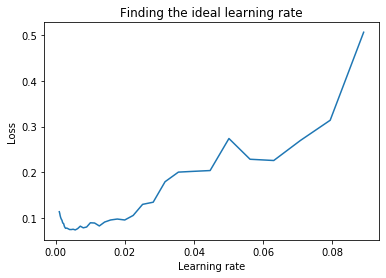

In [170]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.plot(lrs, model3_history.history["loss"])
# plt.semilogx(lrs, model3_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [196]:
def annot_max(x,y, ax=None):
    # np.argmin()
    xmin = x[np.argmin(y)]
    ymin = min(y)
    text= "loss={:.3f}, learning rate={:.3f}".format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmin, ymin), xytext=(0.6,0.5), **kw)


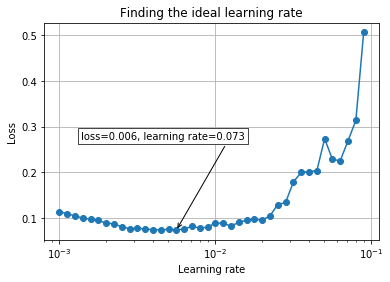

In [197]:
lrs = 1e-3 * (10**(np.arange(40)/20))
min_value = np.min(model3_history.history["loss"])
mask = np.array(model3_history.history["loss"]) == min_value
color = np.where(mask, 'red', 'blue')
fig = plt.figure()
# plt.plot(lrs, model3_history.history["loss"])
plt.semilogx(lrs, model3_history.history["loss"], marker='o') # want the x-axis to be log-scale
annot_max(lrs,model3_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
plt.grid(True)

In [198]:
l_rate = min(model3_history.history["loss"])

In [228]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = model_1

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=l_rate),
                 metrics=["accuracy"])

# Fit the model
model4_history = model_4.fit(train_data,
                               train_labels,
                               epochs=15,
                               validation_data=(test_data, test_labels))

Epoch 1/15
563/563 [==============================] - 2s 2ms/step - loss: 0.4788 - accuracy: 0.6678 - val_loss: 0.4698 - val_accuracy: 0.6660
Epoch 2/15
563/563 [==============================] - 1s 2ms/step - loss: 0.4783 - accuracy: 0.6691 - val_loss: 0.4691 - val_accuracy: 0.6660
Epoch 3/15
563/563 [==============================] - 1s 2ms/step - loss: 0.4799 - accuracy: 0.6622 - val_loss: 0.4693 - val_accuracy: 0.6660
Epoch 4/15
563/563 [==============================] - 1s 2ms/step - loss: 0.4790 - accuracy: 0.6676 - val_loss: 0.4708 - val_accuracy: 0.6660
Epoch 5/15
563/563 [==============================] - 1s 2ms/step - loss: 0.4791 - accuracy: 0.6642 - val_loss: 0.4686 - val_accuracy: 0.6660
Epoch 6/15
563/563 [==============================] - 1s 2ms/step - loss: 0.4791 - accuracy: 0.6655 - val_loss: 0.4861 - val_accuracy: 0.6660
Epoch 7/15
563/563 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 0.6658 - val_loss: 0.4744 - val_accuracy: 0.6660
Epoch 

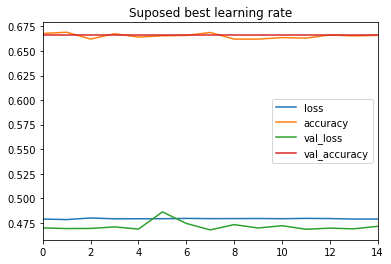

In [229]:
history4_df = pd.DataFrame(model4_history.history)
history4_df.plot(title='Suposed best learning rate')

In [230]:
predicted_labels4 = model_4.predict(test_data)
predicted_labels4 = predicted_labels4.argmax(axis=1)
print(f"Model 4, supposed best rate:\n {confusion_matrix(y_true=test_labels, y_pred=predicted_labels4)}")

Model 4, supposed best rate:
 [[1000    0    0]
 [1000    0    0]
 [   2    0  998]]


# Висновки

Отже, в даній лабораторній роботі було проведено мульти класову класифікацію за допомогою нейронної мережі. Для того, аби підвищити точність було проведено екперимент, який знаходить найкращий крок навчання для мережі. Проте, в даному випадку точність зменшилась, тому що всі елементи класу 0 прогнозуються як клас 4 або навпаки. 